In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
grayImage = r'D:\Cursos Online\Computer_Vision_in_python\practice\Unit 3\albert-einstein_gray.jpg'
colourImage = r'D:\Cursos Online\Computer_Vision_in_python\practice\Unit 3\tulips.jpg'

In [7]:
I_gray = cv2.imread(grayImage, cv2.IMREAD_GRAYSCALE)
I_BGR = cv2.imread(colourImage)

In [12]:
type(I_gray)

numpy.ndarray

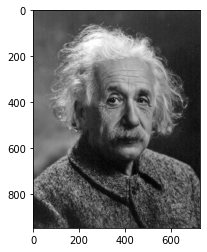

In [24]:
plt.imshow(I_gray, cmap='gray')

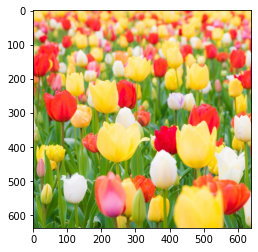

In [25]:
plt.imshow(I_BGR[:,:,::-1])

In [27]:
I_gray_resized = cv2.resize(src=I_gray, fx=2, fy=0.5, dsize=None)

([], [])

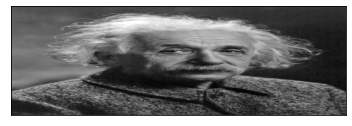

In [29]:
plt.imshow(I_gray_resized, cmap='gray')
plt.xticks([])
plt.yticks([])

In [32]:
I_BGR_resized = cv2.resize(src=I_BGR, fx=0.5, fy=2, dsize=None)

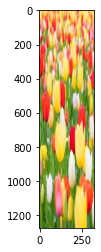

In [33]:
plt.imshow(I_BGR_resized[:,:,::-1])

# Exercise: Zoom in Einstein 2x, using openCV

In [34]:
einstein = cv2.imread(grayImage, cv2.IMREAD_GRAYSCALE)

In [35]:
einstein_2x = cv2.resize(src=einstein, fx=2, fy=2, dsize=None)

([], [])

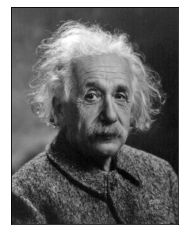

In [38]:
plt.imshow(einstein_2x, cmap='gray')
plt.xticks([])
plt.yticks([])

# Scaling as a linear transform

In [2]:
P = np.array([2,4])

In [8]:
Sx, Sy = 3,0.5

In [9]:
# Scaling Matrix
S = np.array([[Sx,0],[0,Sy]])

In [10]:
P_dash = S.dot(P)

In [11]:
P_dash

array([6., 2.])

# Exercise: Calculate dot product of 3D Point

In [12]:
P_3d = np.array([1,2,3])
Sx, Sy, Sz = 2,2,2
S = np.array([[Sx, 0, 0], [0, Sy, 0], [0, 0, Sz]])
P_3d_dash = S.dot(P_3d)
P_3d_dash

array([2, 4, 6])

# Image Coordinates

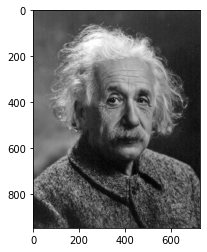

In [15]:
plt.imshow(I_gray, cmap='gray')

In [9]:
numRows = I_gray.shape[0]
numCols = I_gray.shape[1]

In [17]:
print(numRows, numCols)

949 728


In [18]:
I_gray2 = np.zeros((numRows, numCols), dtype='uint8')

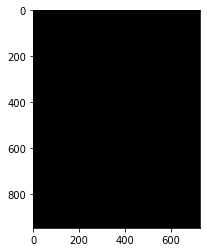

In [19]:
plt.imshow(I_gray2, cmap='gray')

In [25]:
for i in range(numRows):
    for j in range(numCols):
        I_gray2[i,j] = I_gray[i,j]

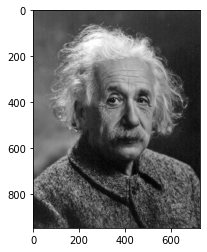

In [26]:
plt.imshow(I_gray2, cmap='gray')

In [27]:
# Upside Down
for i in range(numRows):
    for j in range(numCols):
        I_gray2[numRows - i - 1,j] = I_gray[i,j]

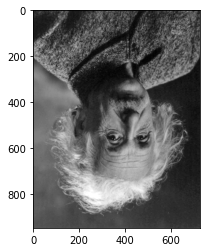

In [28]:
plt.imshow(I_gray2, cmap='gray')

# Exercise: Crop image in exactly half

In [5]:
numRows = I_gray.shape[0] // 2  # Force integer division
numCols = I_gray.shape[1]

In [32]:
croppedIm = np.zeros((numRows, numCols), dtype='uint8')

In [33]:
for i in range(numRows):
    for j in range(numCols):
        croppedIm[i,j] = I_gray[i,j]

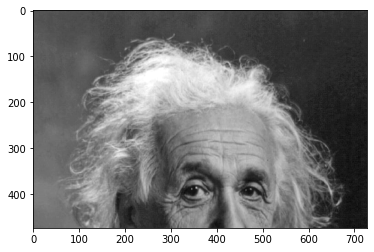

In [34]:
plt.imshow(croppedIm, cmap='gray')

# Exercise: Flip image horizontally

In [35]:
numRows = I_gray.shape[0]
numCols = I_gray.shape[1]

In [36]:
flipped_img = np.zeros((numRows, numCols), dtype='uint8')

In [37]:
for i in range(numRows):
    for j in range(numCols):
        flipped_img[i, numCols - j - 1] = I_gray[i,j]

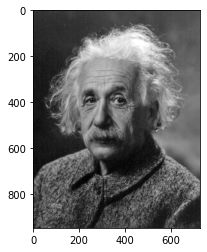

In [38]:
plt.imshow(flipped_img, cmap='gray')

# Holes and Saturations

In [28]:
S = np.array([[2,0],[0,2]])

In [29]:
I2 = np.ones((2*numRows, 2*numCols), dtype='uint8')*255

In [30]:
for i in range(numRows):
    for j in range(numCols):
        P = np.array([i,j])
        P_dash = S.dot(P)
        new_i, new_j = P_dash[0], P_dash[1]
        I2[new_i, new_j] = I_gray[i,j]

In [10]:
import matplotlib as mpl

def displayImageInActualSize(I):
    dpi = mpl.rcParams['figure.dpi']
    H,W = I.shape
    fig_size = W/float(dpi), H/float(dpi)
    fig = plt.figure(figsize=fig_size)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(I,cmap='gray')
    plt.show

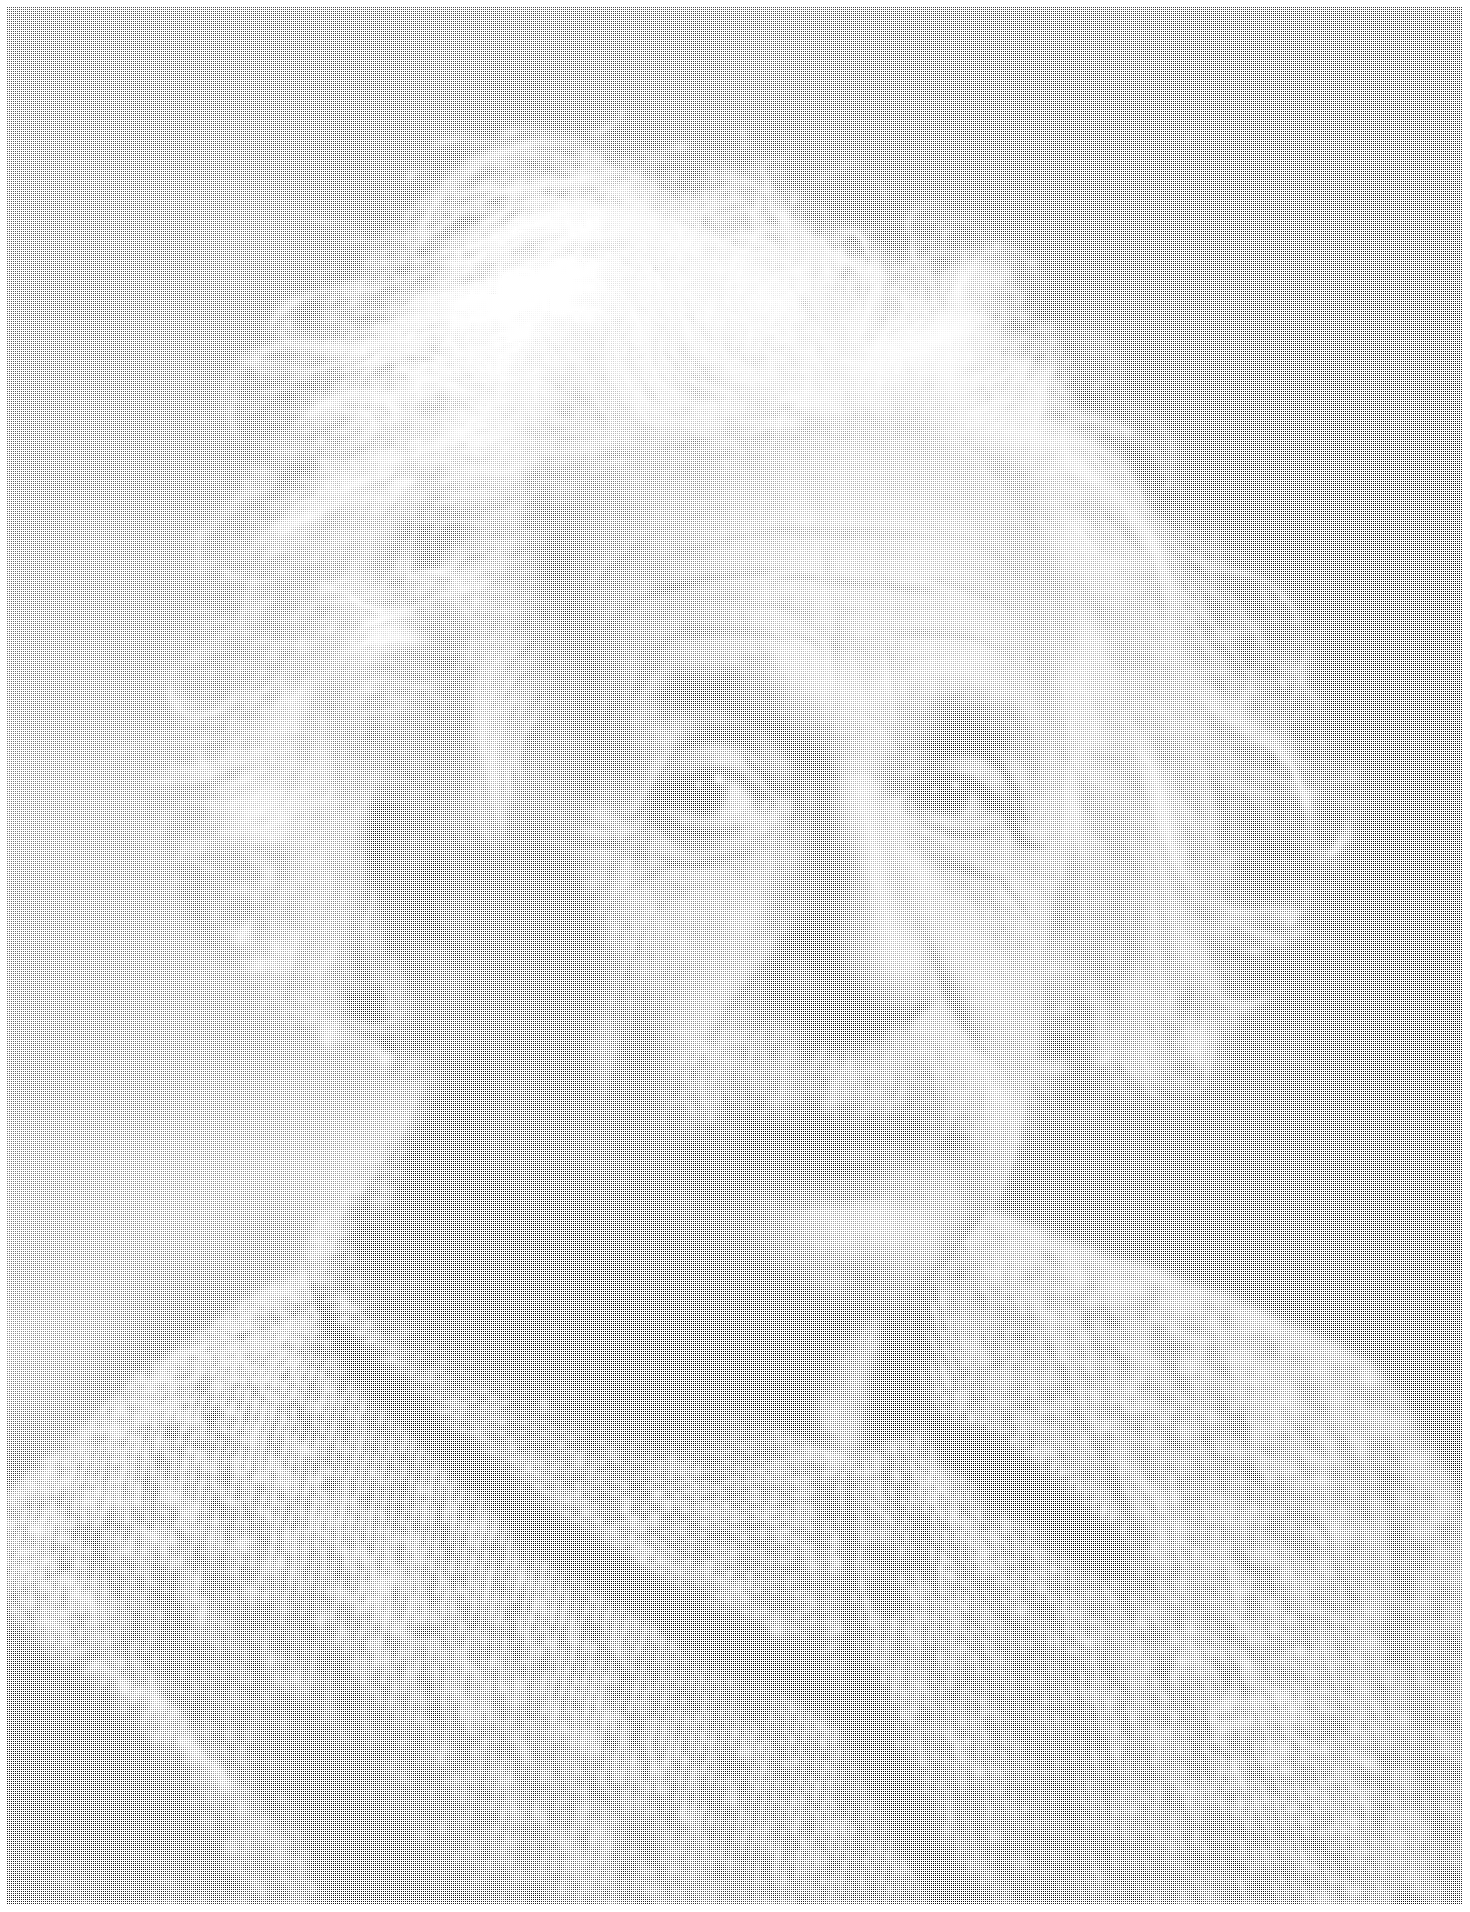

In [32]:
displayImageInActualSize(I2)

# Inverse Scaling
## Nearest Neighbour Interpolation

In [9]:
numRows = I_gray.shape[0]
numCols = I_gray.shape[1]
S = np.array([[2,0], [0,2]])
I2 = np.zeros((2*numRows, 2*numCols), dtype='uint8')
Tinv = np.linalg.inv(S)

for new_i in range(I2.shape[0]):
    for new_j in range(I2.shape[1]):
        P_dash = np.array([new_i,new_j])
        P = Tinv.dot(P_dash)
        # Nearest Neighbour interpolation
        P = np.int16(np.round(P))   # This is what check for the nearest neighbour
        i, j = P[0], P[1]
        if i < 0 or i>=numRows or j<0 or j>=numCols:
            pass
        else:
            I2[new_i, new_j] = I_gray[i,j]


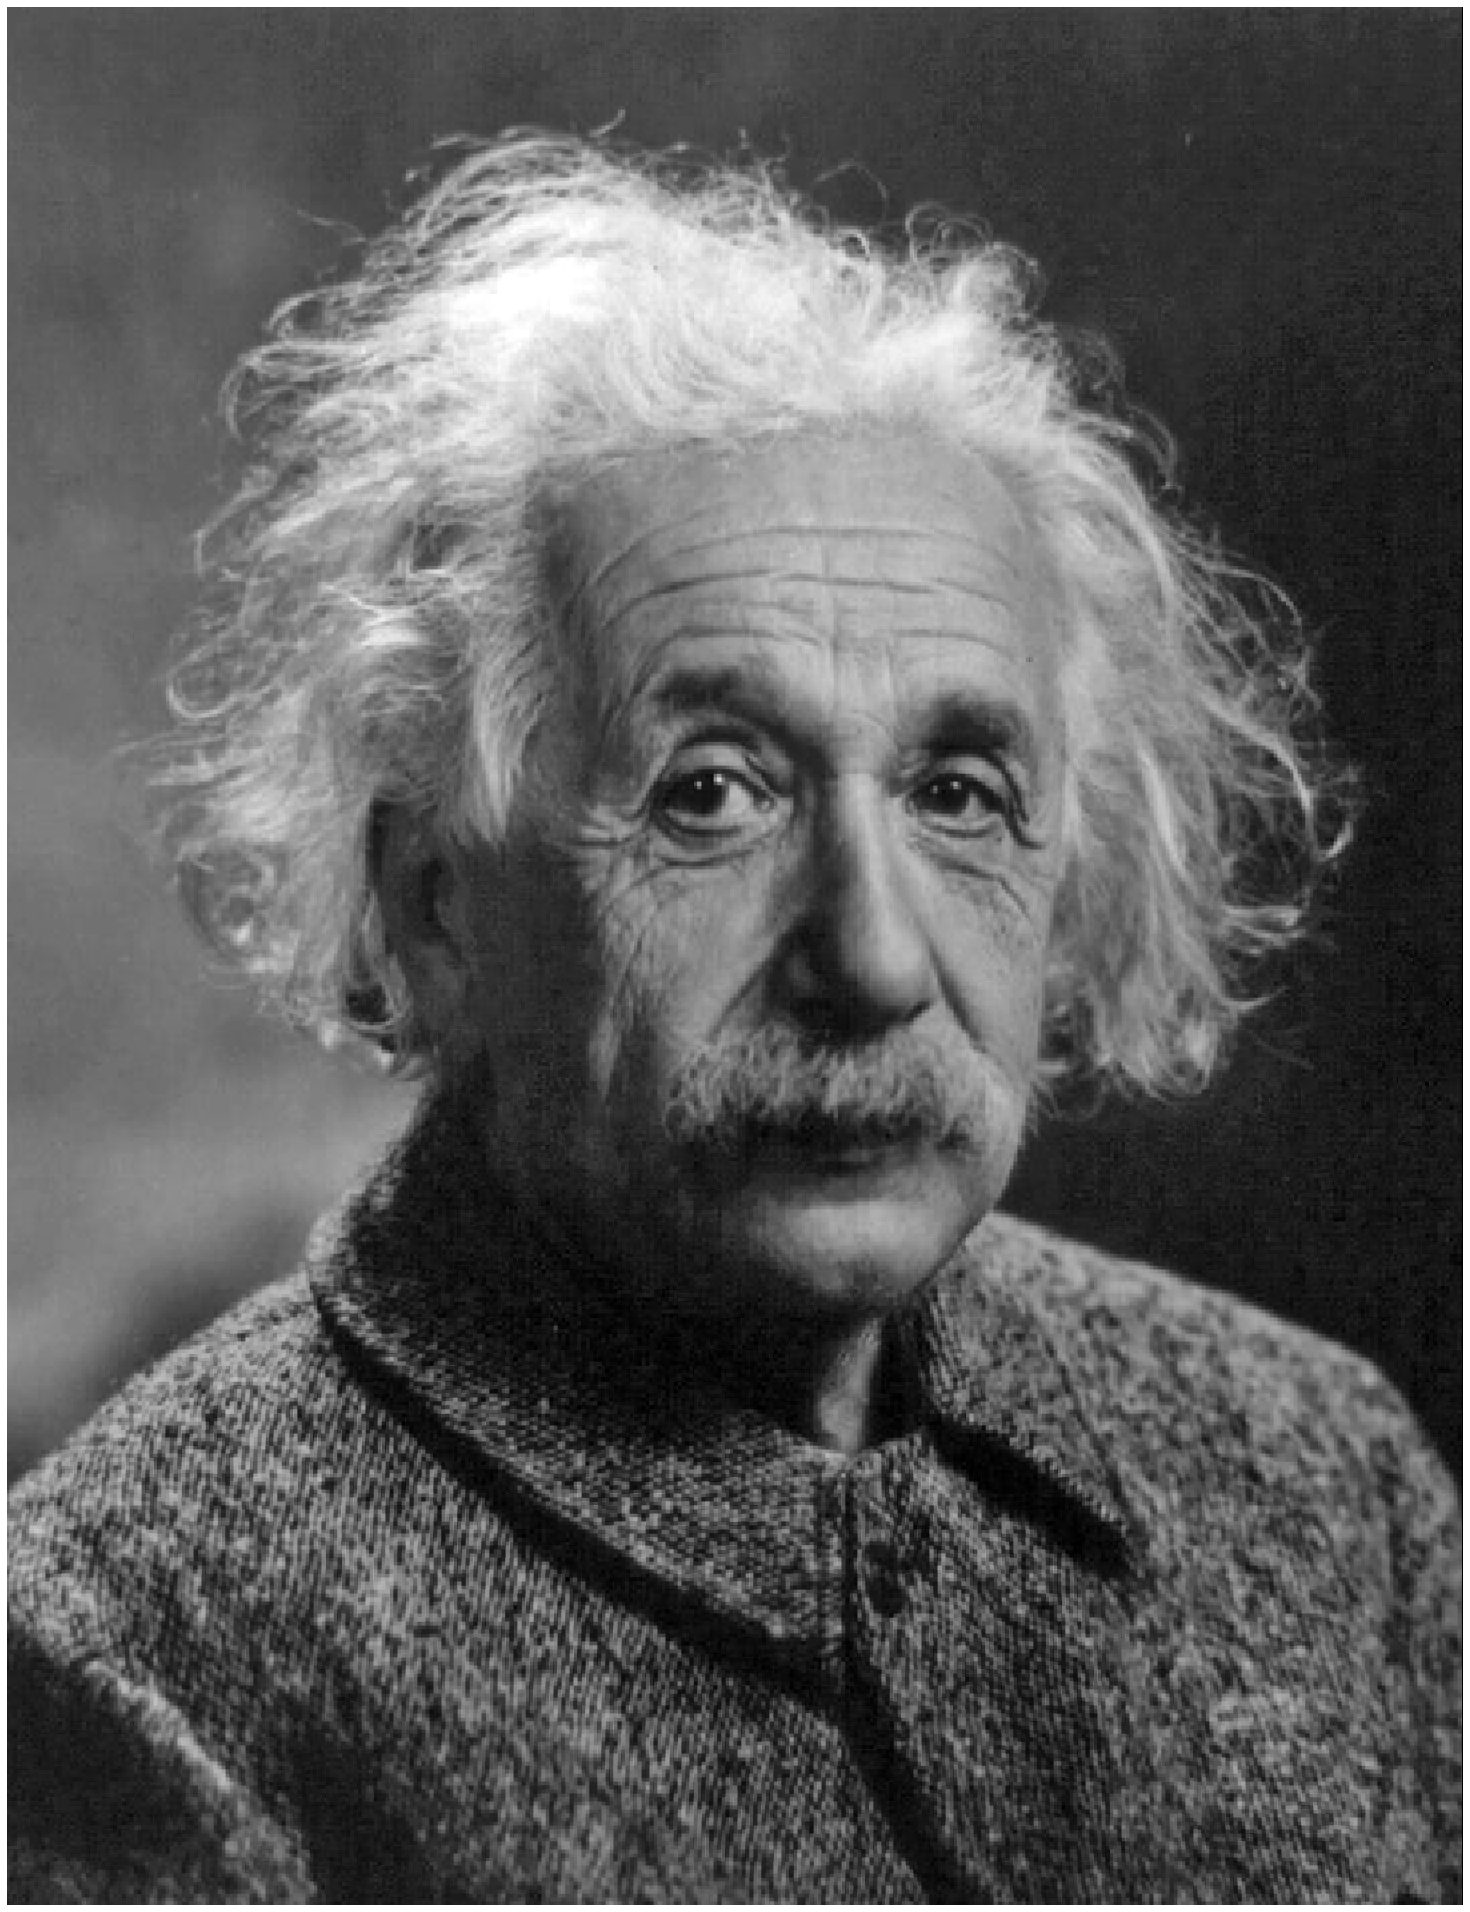

In [10]:
displayImageInActualSize(I2)

## Bilinear Interpolation

In [5]:
def bilinearInterpolation(r, c, I):
   
    # Column indexes
    lc = int(c) # left column
    rc = lc+1   # right column

    # Row indexes
    tr = int(r) # top row
    br = tr + 1 # bottom row

    # Weights of horizontal linear indexes
    wr = c - lc
    wl = rc - c

    # Weights of vertical linear indexes
    wt = br - r
    wb = r - tr

    if tr >= 0 and br < I.shape[0] and lc >= 0 and rc < I.shape[1]:  
        # Intensity alpha (top row linear)
        a = I[tr, lc] * wl + I[tr, rc] * wr
        # Intensity betha (bottom row linear)
        b = I[br, lc] * wl + I[br, rc] * wr

        # Final intensity (vertical linear)
        f = a * wt + b * wb

        return np.uint8(f)
    else:
        return 0


In [8]:
numRows = I_gray.shape[0]
numCols = I_gray.shape[1]
S = np.array([[2,0], [0,2]])
I2 = np.zeros((2*numRows, 2*numCols), dtype='uint8')
Tinv = np.linalg.inv(S)

for new_i in range(I2.shape[0]):
    for new_j in range(I2.shape[1]):
        P_dash = np.array([new_i,new_j])
        P = Tinv.dot(P_dash)
        # Bilinear interpolation
        P = np.int16(np.round(P))
        i, j = P[0], P[1]
        if i < 0 or i>=numRows or j<0 or j>=numCols:
            pass
        else:
            g = bilinearInterpolation(i,j,I_gray)
            I2[new_i, new_j] = g


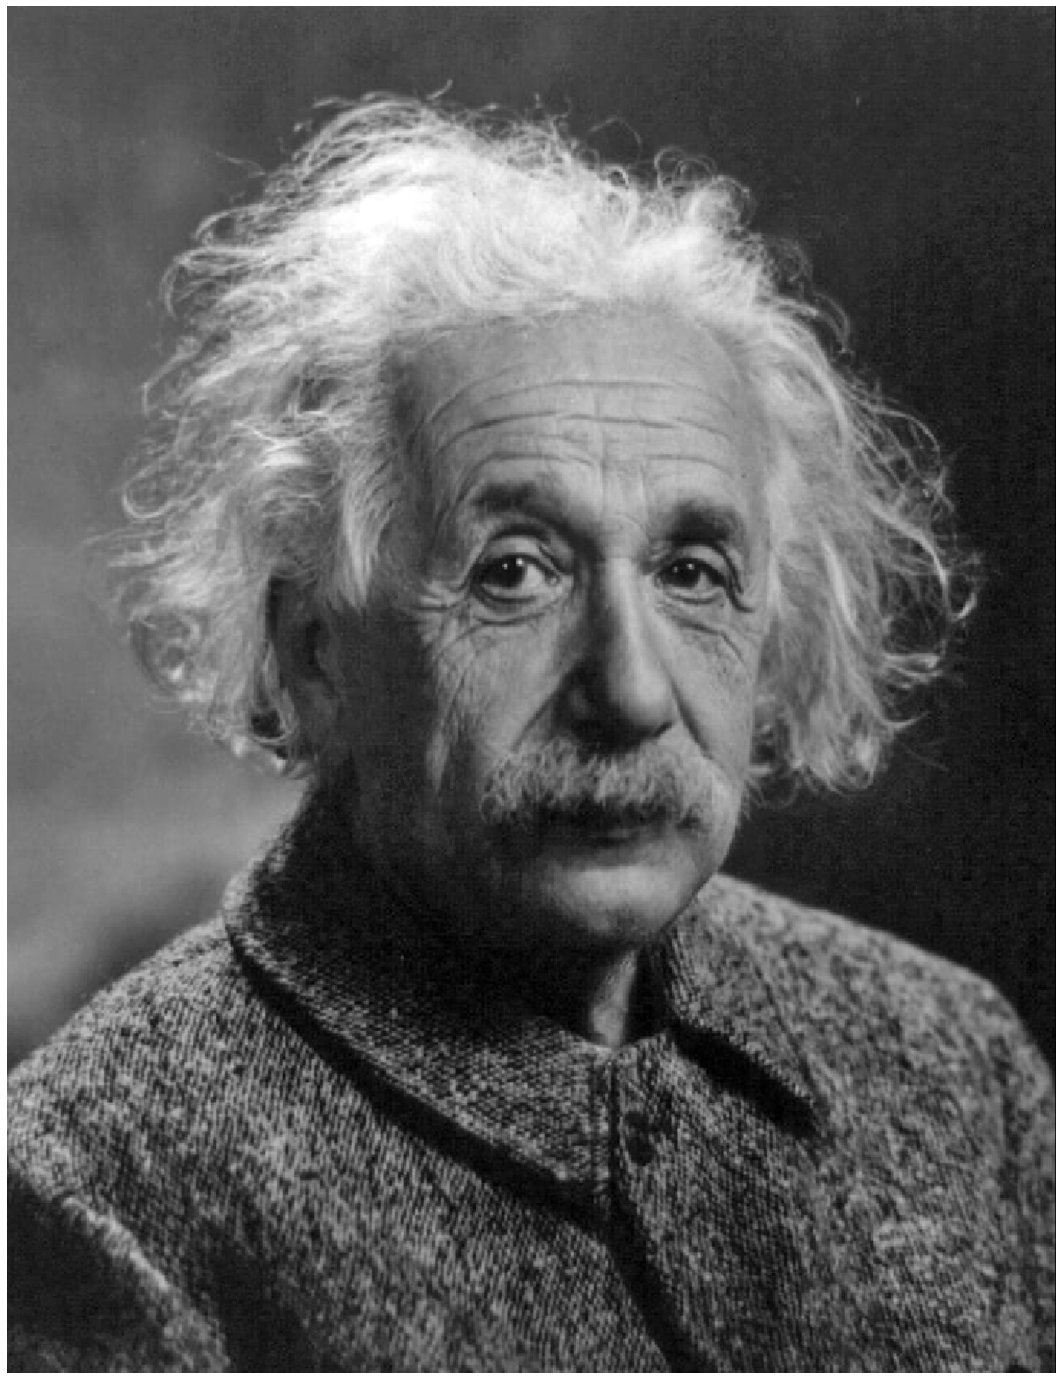

In [11]:
displayImageInActualSize(I2)